In [1]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../script/')
import palade #palade.plotでパレード図を描画
%matplotlib inline

In [2]:
air_reserve = pd.read_csv("../data/train_air_reserve.csv")

In [3]:
air_visit = pd.read_csv("../data/train_air_visit.csv")

In [4]:
air_reserve["reserve_datetime"] = pd.to_datetime(air_reserve["reserve_datetime"])
air_reserve["visit_datetime"] = pd.to_datetime(air_reserve["visit_datetime"])

In [5]:
air_visit["visit_date"] = pd.to_datetime(air_visit["visit_date"])

In [6]:
air_reserve.head(2)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3


In [7]:
air_reserve["reserve_year"] = air_reserve["reserve_datetime"].dt.year
air_reserve["reserve_month"] = air_reserve["reserve_datetime"].dt.month
air_reserve["reserve_day"] = air_reserve["reserve_datetime"].dt.day
air_reserve["reserve_time"] = air_reserve["reserve_datetime"].dt.time
air_reserve["reserve_ymd"] = air_reserve["reserve_year"].astype(str)+"-"+air_reserve["reserve_month"].astype(str)+"-"+air_reserve["reserve_day"].astype(str)
air_reserve["reserve_ymd"] = pd.to_datetime(air_reserve["reserve_ymd"])
air_reserve["reserve_ym"] = air_reserve["reserve_year"].astype(str)+"-"+air_reserve["reserve_month"].astype(str)
air_reserve["reserve_ym"] = pd.to_datetime(air_reserve["reserve_ym"])

In [8]:
air_reserve["visit_year"] = air_reserve["visit_datetime"].dt.year
air_reserve["visit_month"] = air_reserve["visit_datetime"].dt.month
air_reserve["visit_day"] = air_reserve["visit_datetime"].dt.day
air_reserve["visit_time"] = air_reserve["visit_datetime"].dt.time
air_reserve["visit_ymd"] = air_reserve["visit_year"].astype(str)+"-"+air_reserve["visit_month"].astype(str)+"-"+air_reserve["visit_day"].astype(str)
air_reserve["visit_ymd"] = pd.to_datetime(air_reserve["visit_ymd"])
air_reserve["visit_ym"] = air_reserve["visit_year"].astype(str)+"-"+air_reserve["visit_month"].astype(str)
air_reserve["visit_ym"] = pd.to_datetime(air_reserve["visit_ym"])

In [9]:
air_visit["visit_year"] = air_visit["visit_date"].dt.year
air_visit["visit_month"] = air_visit["visit_date"].dt.month
air_visit["visit_day"] = air_visit["visit_date"].dt.day
air_visit["visit_time"] = air_visit["visit_date"].dt.time
air_visit["visit_ymd"] = air_visit["visit_year"].astype(str)+"-"+air_visit["visit_month"].astype(str)+"-"+air_visit["visit_day"].astype(str)
air_visit["visit_ymd"] = pd.to_datetime(air_visit["visit_ymd"])
air_visit["visit_ym"] = air_visit["visit_year"].astype(str)+"-"+air_visit["visit_month"].astype(str)
air_visit["visit_ym"] = pd.to_datetime(air_visit["visit_ym"])

In [10]:
air_reserve["visit_weekday"] = air_reserve["visit_datetime"].dt.weekday_name

### 予約平均回数  
予約回数 / 集計期間

In [12]:
reserve_counts_mean= pd.DataFrame(air_reserve.groupby("air_store_id")["visit_datetime"].count()/439)

In [13]:
reserve_counts_mean = reserve_counts_mean.rename(columns= {"visit_datetime":"mean"})

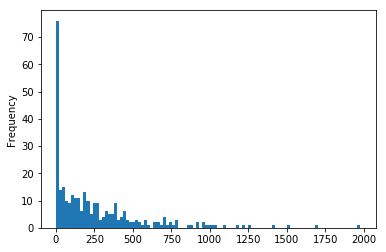

In [14]:
air_reserve.groupby("air_store_id")["visit_datetime"].count().plot.hist(bins=100)

### 予約人数の最頻値

In [85]:
air_reserve.groupby(["air_store_id","visit_weekday"])["visit_datetime"].count().head()

air_store_id          visit_weekday
air_00a91d42b08b08d9  Monday           2
                      Saturday         2
                      Thursday         1
                      Tuesday          2
                      Wednesday        2
Name: visit_datetime, dtype: int64

In [86]:
air_reserve.groupby(["air_store_id","reserve_ymd"])["reserve_visitors"].sum().head()

air_store_id          reserve_ymd
air_00a91d42b08b08d9  2016-10-31      2
                      2016-12-01      9
                      2016-12-08     18
                      2016-12-11      2
                      2016-12-18      4
Name: reserve_visitors, dtype: int64

In [17]:
temp = air_reserve.groupby(["air_store_id","reserve_visitors"])["visit_datetime"].count()

In [18]:
reserve_visitor_mode = pd.concat([pd.Series([element for tupl in temp.groupby("air_store_id").idxmax().values for element in tupl[0::2]]),
          pd.Series([element for tupl in temp.groupby("air_store_id").idxmax().values for element in tupl[1::2]])],axis=1)

reserve_visitor_mode = reserve_visitor_mode.rename(columns={0:"air_store_id",1:"mode"})

In [87]:
reserve_visitor_mode.head()

,air_store_id,mode
0,air_00a91d42b08b08d9,2
1,air_0164b9927d20bcc3,2
2,air_034a3d5b40d5b1b1,2
3,air_03963426c9312048,2
4,air_04341b588bde96cd,10


### 平均訪問者数

In [20]:
visit_visitors_mean = air_visit.groupby("air_store_id")["visitors"].mean()

In [21]:
visit_visitors_mean = pd.DataFrame(visit_visitors_mean).rename(columns={"visitors":"visitors_mean"})

### 営業時間  

訪問予定時間の最大、最小?
予約

In [22]:
air_reserve["visit_time"] = air_reserve["visit_time"].astype(str).str[:2]

In [23]:
temp = air_reserve[["air_store_id","visit_time","visit_datetime"]].groupby(["air_store_id","visit_time"]).count()

In [24]:
temp.head(2)

visit_datetime
air_store_id         visit_time                
air_00a91d42b08b08d9 18                       1
                     19                       5

In [25]:
business_time = np.logical_not(pd.pivot_table(temp,index="air_store_id",columns="visit_time").isnull())*1

In [26]:
business_time.head()

visit_datetime                            ...           \
visit_time                       00 01 02 03 04 05 06 07 08 09 ... 14 15 16   
air_store_id                                                   ...            
air_00a91d42b08b08d9              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_0164b9927d20bcc3              1  1  0  0  0  0  0  0  0  0 ...  0  0  0   
air_034a3d5b40d5b1b1              0  0  0  0  0  0  0  0  0  0 ...  0  1  1   
air_03963426c9312048              0  0  0  0  0  0  0  0  0  0 ...  1  1  1   
air_04341b588bde96cd              1  0  0  0  0  0  0  0  0  0 ...  0  1  0   

                                           
visit_time           17 18 19 20 21 22 23  
air_store_id                               
air_00a91d42b08b08d9  0  1  1  1  0  0  0  
air_0164b9927d20bcc3  1  1  1  1  1  1  1  
air_034a3d5b40d5b1b1  1  1  1  1  0  0  1  
air_03963426c9312048  1  1  1  1  1  1  1  
air_04341b588bde96cd  0  1  1  1  1  1  0  

[5 rows x 24 columns]

In [27]:
business_time.columns = business_time.columns.levels[1]

In [88]:
business_time.head()

visit_time,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
air_store_id,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
air_0164b9927d20bcc3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
air_034a3d5b40d5b1b1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,0,0,1
air_03963426c9312048,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
air_04341b588bde96cd,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [29]:
air_reserve["visit_time"] = air_reserve["visit_datetime"].dt.time

In [30]:
visit_start_time = pd.DataFrame(air_reserve.groupby("air_store_id")["visit_time"].min())
visit_start_time = visit_start_time.rename(columns={"visit_time":"start_time"})

In [31]:
visit_end_time = pd.DataFrame(air_reserve.groupby("air_store_id")["visit_time"].max())
visit_end_time = visit_end_time.rename(columns={"visit_time":"end_time"})

### 席数(最大同時予約人数?)
暫定 : 同じ時間に訪問する予定人数で最大を取得

In [32]:
temp = air_reserve.groupby(["air_store_id","visit_datetime"])["reserve_visitors"].sum()

In [33]:
temp.head(2)

air_store_id          visit_datetime     
air_00a91d42b08b08d9  2016-10-31 20:00:00    2
                      2016-12-05 19:00:00    9
Name: reserve_visitors, dtype: int64

In [34]:
temp.values

array([ 2,  9, 18, ...,  8,  2,  5])

In [35]:
reserve_seats = pd.DataFrame(temp.groupby("air_store_id").max())
reserve_seats = reserve_seats.rename(columns={"reserve_visitors":"seats"})

### 回転率

一日の来客数 /　席数

In [89]:
reserve_seats.head()#["air_store_id"]

,seats
air_store_id,
air_00a91d42b08b08d9,18
air_0164b9927d20bcc3,16
air_034a3d5b40d5b1b1,50
air_03963426c9312048,78
air_04341b588bde96cd,37


In [37]:
rotational_speed  = pd.merge(air_visit,reserve_seats,left_on="air_store_id",right_index=True)
rotational_speed["rot_speed"] = rotational_speed["visitors"]/rotational_speed["seats"]

### 予約率の算出

#### 1日の予約人数合計

In [38]:
pd.DataFrame(air_reserve.groupby(["air_store_id","visit_ymd"])["reserve_visitors"].sum()).reset_index().tail(2)

,air_store_id,visit_ymd,reserve_visitors
24882,air_fea5dc9594450608,2017-03-29,2
24883,air_fee8dcf4d619598e,2017-01-09,5


In [39]:
reserve_visit_diff = pd.merge(pd.DataFrame(air_reserve.groupby(["air_store_id","visit_ymd"])["reserve_visitors"].sum()).reset_index(),air_visit,left_on=["air_store_id","visit_ymd"],right_on=["air_store_id","visit_date"] )[["air_store_id","visit_date","visitors","reserve_visitors"]]

In [40]:
reserve_visit_diff["reserve_rat"] = reserve_visit_diff["reserve_visitors"]/reserve_visit_diff["visitors"]

In [41]:
reserve_visit_diff["reserve_diff"] = reserve_visit_diff["visitors"] - reserve_visit_diff["reserve_visitors"]

### genre

In [42]:
raw_air_store_info = pd.read_csv('../data/air_store_info.csv', engine='python', encoding='UTF-8')

In [43]:
raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count().reset_index().head(9)

,air_area_name,air_genre_name,air_store_id
0,Fukuoka-ken Fukuoka-shi Daimyō,Bar/Cocktail,7
1,Fukuoka-ken Fukuoka-shi Daimyō,Cafe/Sweets,26
2,Fukuoka-ken Fukuoka-shi Daimyō,Creative cuisine,2
3,Fukuoka-ken Fukuoka-shi Daimyō,Dining bar,5
4,Fukuoka-ken Fukuoka-shi Daimyō,Italian/French,9
5,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,6
6,Fukuoka-ken Fukuoka-shi Daimyō,Japanese food,3
7,Fukuoka-ken Fukuoka-shi Daimyō,Other,3
8,Fukuoka-ken Fukuoka-shi Daimyō,Yakiniku/Korean food,3


In [44]:
genre_rank_in_area = raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count().groupby("air_area_name").rank().reset_index().rename(columns={"air_store_id":"rank"})

In [90]:
raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count().head()#.reset_index(name="count").sort_values(["count"],ascending=False)#.head(9)

air_area_name                   air_genre_name  
Fukuoka-ken Fukuoka-shi Daimyō  Bar/Cocktail         7
                                Cafe/Sweets         26
                                Creative cuisine     2
                                Dining bar           5
                                Italian/French       9
Name: air_store_id, dtype: int64

In [46]:
a = raw_air_store_info.groupby("air_area_name")["air_genre_name"].value_counts().reset_index(name="genre_count")

In [47]:
b = raw_air_store_info.groupby("air_area_name")["air_genre_name"].count().reset_index(name = "genre_all_count")

In [49]:
genre_freq_in_area = pd.merge(a,b)
genre_freq_in_area["genre_freq_in_area"] = genre_freq_in_area["genre_count"]/genre_freq_in_area["genre_all_count"]

### n日前の訪問人数

In [50]:
test = air_visit

In [51]:
test["diff1"] = test["visit_date"] + datetime.timedelta(days=1)

In [52]:
diff1_visitors = pd.merge(air_visit, test[["air_store_id","visitors","diff1"]], left_on=["air_store_id","visit_date"], right_on=["air_store_id","diff1"] )

In [53]:
diff1_visitors = diff1_visitors.rename(columns={"visitors_x":"visitors","visitors_y":"diff1_visitors"})[["air_store_id","visit_date","diff1_visitors"]]

In [54]:
diff1_visitors["visit_date"] = pd.to_datetime(diff1_visitors["visit_date"])

In [91]:
diff1_visitors.head()

,air_store_id,visit_date,diff1_visitors
0,air_ba937bf13d40fb24,2016-01-14,25
1,air_ba937bf13d40fb24,2016-01-15,32
2,air_ba937bf13d40fb24,2016-01-16,29
3,air_ba937bf13d40fb24,2016-01-19,6
4,air_ba937bf13d40fb24,2016-01-20,9


In [56]:
air_visit["visit_date"][0]

Timestamp('2016-01-13 00:00:00')

genreとjoin

In [57]:
temp = pd.DataFrame(air_reserve["air_store_id"].unique())
temp = temp.rename(columns={0:"air_store_id"})

In [58]:
reserve_true_store_list = pd.merge(temp,raw_air_store_info)

/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


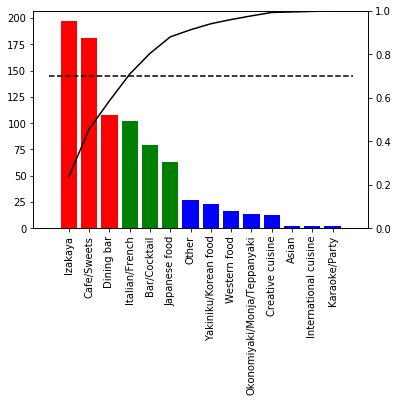

In [59]:
palade.count_plot(raw_air_store_info,"air_genre_name",rotation=90,ABC=True,x_numbers=14,hline_cum=0.7)

#### genreによって予約可能店舗数に違いがあるかチェック

In [60]:
a = raw_air_store_info["air_genre_name"].value_counts().sort_index()
b = reserve_true_store_list["air_genre_name"].value_counts().sort_index()
pd.concat([a,b,(a-b)/a],axis=1)

,air_genre_name,air_genre_name,air_genre_name
Asian,2,1,0.500000
Bar/Cocktail,79,14,0.822785
Cafe/Sweets,181,19,0.895028
Creative cuisine,13,3,0.769231
Dining bar,108,45,0.583333
International cuisine,2,1,0.500000
Italian/French,102,55,0.460784
Izakaya,197,106,0.461929
Japanese food,63,27,0.571429
Karaoke/Party,2,1,0.500000


#### 2016-07-01前は316店舗分のデータしか存在しない

In [62]:
air_visit[air_visit["visit_date"] < "2016-07-01"].describe(include="all")

,air_store_id,visit_date,visitors,visit_year,visit_month,visit_day,visit_time,visit_ymd,visit_ym,diff1
count,47699,47699,47699.000000,47699.0,47699.000000,47699.000000,47699,47699,47699,47699
unique,316,182,NaN,NaN,NaN,NaN,1,182,6,182
top,air_a083834e7ffe187e,2016-06-24 00:00:00,NaN,NaN,NaN,NaN,00:00:00,2016-06-24 00:00:00,2016-03-01 00:00:00,2016-06-25 00:00:00
freq,182,304,NaN,NaN,NaN,NaN,47699,304,8278,304
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00
last,NaN,2016-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00
mean,NaN,NaN,21.800499,2016.0,3.564121,15.948217,NaN,NaN,NaN,NaN
std,NaN,NaN,17.086586,0.0,1.692667,8.677865,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,2016.0,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,9.000000,2016.0,2.000000,9.000000,NaN,NaN,NaN,NaN


In [63]:
air_visit.describe(include= "all")

,air_store_id,visit_date,visitors,visit_year,visit_month,visit_day,visit_time,visit_ymd,visit_ym,diff1
count,224077,224077,224077.000000,224077.000000,224077.000000,224077.000000,224077,224077,224077,224077
unique,829,439,NaN,NaN,NaN,NaN,1,439,15,439
top,air_5c817ef28f236bdf,2017-03-03 00:00:00,NaN,NaN,NaN,NaN,00:00:00,2017-03-03 00:00:00,2016-12-01 00:00:00,2017-03-04 00:00:00
freq,438,791,NaN,NaN,NaN,NaN,224077,791,21515,791
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00
last,NaN,2017-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,2017-03-14 00:00:00,2017-03-01 00:00:00,2017-03-15 00:00:00
mean,NaN,NaN,20.823061,2016.221094,6.539154,15.463756,NaN,NaN,NaN,NaN
std,NaN,NaN,16.534754,0.414984,3.771311,8.731035,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,9.000000,2016.000000,3.000000,8.000000,NaN,NaN,NaN,NaN


In [64]:
temp = pd.DataFrame(air_reserve["air_store_id"].unique())
temp2 = pd.DataFrame(air_visit[air_visit["visit_date"] < "2016-07-01"]["air_store_id"].unique())

In [92]:
pd.merge(temp,temp2).head()

MergeError: No common columns to perform merge on

/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


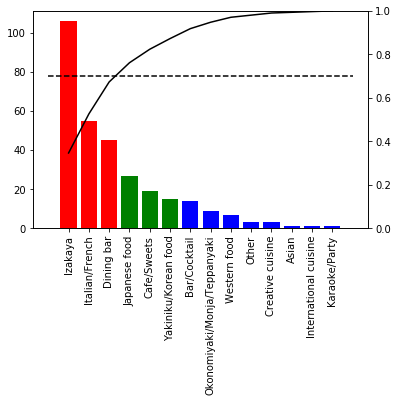

In [66]:
palade.count_plot(reserve_true_store_list,"air_genre_name",rotation=90,ABC=True,x_numbers=14,hline_cum=0.7)

In [67]:
pd.merge(air_reserve,raw_air_store_info,on="air_store_id").head()#["air_genre_name"].unique()#.groupby("air_store_id").count()#["air_genre_name"]

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,reserve_year,reserve_month,reserve_day,reserve_time,reserve_ymd,reserve_ym,...,visit_month,visit_day,visit_time,visit_ymd,visit_ym,visit_weekday,air_genre_name,air_area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,1,16:00:00,2016-01-01,2016-01-01,...,1,1,19:00:00,2016-01-01,2016-01-01,Friday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,1,16:00:00,2016-01-01,2016-01-01,...,1,1,20:00:00,2016-01-01,2016-01-01,Friday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,2016,1,1,16:00:00,2016-01-01,2016-01-01,...,1,2,18:00:00,2016-01-02,2016-01-01,Saturday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,2016,1,1,16:00:00,2016-01-01,2016-01-01,...,1,2,21:00:00,2016-01-02,2016-01-01,Saturday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,2016,1,4,20:00:00,2016-01-04,2016-01-01,...,1,8,21:00:00,2016-01-08,2016-01-01,Friday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
5,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-08 21:00:00,2,2016,1,8,21:00:00,2016-01-08,2016-01-01,...,1,8,21:00:00,2016-01-08,2016-01-01,Friday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
6,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-05 13:00:00,3,2016,1,5,13:00:00,2016-01-05,2016-01-01,...,1,8,21:00:00,2016-01-08,2016-01-01,Friday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
7,air_877f79706adbfb06,2016-01-09 20:00:00,2016-01-06 23:00:00,2,2016,1,6,23:00:00,2016-01-06,2016-01-01,...,1,9,20:00:00,2016-01-09,2016-01-01,Saturday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
8,air_877f79706adbfb06,2016-01-09 21:00:00,2016-01-09 21:00:00,4,2016,1,9,21:00:00,2016-01-09,2016-01-01,...,1,9,21:00:00,2016-01-09,2016-01-01,Saturday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
9,air_877f79706adbfb06,2016-01-09 22:00:00,2016-01-05 12:00:00,2,2016,1,5,12:00:00,2016-01-05,2016-01-01,...,1,9,22:00:00,2016-01-09,2016-01-01,Saturday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [69]:
print(visit_start_time.shape)
visit_start_time.tail(2)

(306, 1)


,start_time
air_store_id,
air_fea5dc9594450608,02:00:00
air_fee8dcf4d619598e,19:00:00


In [70]:
print(visit_end_time.shape)
visit_end_time.tail(2)

(306, 1)


,end_time
air_store_id,
air_fea5dc9594450608,22:00:00
air_fee8dcf4d619598e,19:00:00


In [71]:
print(reserve_counts_mean.shape)
reserve_counts_mean.tail(2)

(306, 1)


,mean
air_store_id,
air_fea5dc9594450608,0.248292
air_fee8dcf4d619598e,0.004556


In [72]:
reserve_visitor_mode.tail(2)

,air_store_id,mode
304,air_fea5dc9594450608,2
305,air_fee8dcf4d619598e,2


In [73]:
reserve_seats.tail(2)

,seats
air_store_id,
air_fea5dc9594450608,13
air_fee8dcf4d619598e,5


In [75]:
rotational_speed[["air_store_id","visit_date","rot_speed"]].head(2)


,air_store_id,visit_date,rot_speed
905,air_35512c42db0868da,2016-02-25,0.166667
906,air_35512c42db0868da,2016-02-26,1.083333


In [76]:
reserve_visit_diff[["air_store_id","visit_date","reserve_visitors","reserve_diff"]].head()

,air_store_id,visit_date,reserve_visitors,reserve_diff
0,air_00a91d42b08b08d9,2016-10-31,2,24
1,air_00a91d42b08b08d9,2016-12-05,9,24
2,air_00a91d42b08b08d9,2016-12-14,18,12
3,air_00a91d42b08b08d9,2016-12-17,2,15
4,air_00a91d42b08b08d9,2016-12-20,4,33


In [79]:
print(visit_visitors_mean.shape)
visit_visitors_mean.tail(2)

(829, 1)


,visitors_mean
air_store_id,
air_ffcc2d5087e1b476,20.086538
air_fff68b929994bfbd,5.165217


In [80]:
genre_rank_in_area.tail(2)

,air_area_name,air_genre_name,rank
242,Ōsaka-fu Ōsaka-shi Ōhiraki,Cafe/Sweets,1.5
243,Ōsaka-fu Ōsaka-shi Ōhiraki,Izakaya,1.5


In [81]:
genre_freq_in_area.tail(2)

,air_area_name,air_genre_name,genre_count,genre_all_count,genre_freq_in_area
242,Ōsaka-fu Ōsaka-shi Ōhiraki,Cafe/Sweets,2,4,0.5
243,Ōsaka-fu Ōsaka-shi Ōhiraki,Izakaya,2,4,0.5


In [82]:
temp = pd.merge(genre_freq_in_area,genre_rank_in_area,on=["air_area_name","air_genre_name"])

In [83]:
genre_data = pd.merge(raw_air_store_info,temp)

In [108]:
genre_data

,air_store_id,air_genre_name,air_area_name,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,4,17,0.235294,5.5
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,4,17,0.235294,5.5
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,4,17,0.235294,5.5
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,4,17,0.235294,5.5
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,13,51,0.254902,7.0
5,air_99c3eae84130c1cb,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,13,51,0.254902,7.0
6,air_f183a514cb8ff4fa,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,13,51,0.254902,7.0
7,air_6b9fa44a9cf504a1,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,13,51,0.254902,7.0
8,air_0919d54f0c9a24b8,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,13,51,0.254902,7.0
9,air_2c6c79d597e48096,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,13,51,0.254902,7.0


In [109]:
resume = pd.merge(reserve_counts_mean,business_time,left_index=True, right_index=True)
resume = pd.merge(resume,reserve_visitor_mode,left_index=True, right_on="air_store_id")
resume = pd.merge(resume,reserve_seats,left_on="air_store_id",  right_index=True)
resume = pd.merge(rotational_speed[["air_store_id","visit_date","rot_speed"]],resume,left_on="air_store_id",  right_on="air_store_id")
resume = pd.merge(resume,reserve_visit_diff[["air_store_id","visit_date","reserve_visitors","reserve_diff"]],left_on=["air_store_id","visit_date"],  right_on=["air_store_id","visit_date"])
resume = pd.merge(resume,visit_visitors_mean,left_on="air_store_id",  right_index=True)
resume = pd.merge(resume, diff1_visitors[["air_store_id","visit_date","diff1_visitors"]], left_on=["air_store_id","visit_date"],  right_on=["air_store_id","visit_date"])
#resume = pd.merge(resume, genre_data)

In [96]:
format1 = pd.read_csv("../data/features_format.csv")

In [97]:
format1.shape

(360419, 3)

In [110]:
resume["visit_date"]= resume["visit_date"].astype(str)

In [114]:
id_unique_columns = resume[["air_store_id","mean","00",'00', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23',"mode","seats","visitors_mean"]]

In [115]:
id_date_unique_columns = resume[["air_store_id","visit_date","rot_speed","reserve_visitors","reserve_diff","diff1_visitors"]]

In [116]:
id_date_unique_columns.head()

,air_store_id,visit_date,rot_speed,reserve_visitors,reserve_diff,diff1_visitors
0,air_35512c42db0868da,2016-02-27,0.5000,12,-6,13
1,air_ee3a01f0c71a769f,2016-01-09,3.5625,25,32,21
2,air_ee3a01f0c71a769f,2016-01-10,2.0000,5,27,57
3,air_ee3a01f0c71a769f,2016-01-11,2.1875,6,29,32
4,air_ee3a01f0c71a769f,2016-01-16,2.1250,6,28,10


In [118]:
a = pd.merge(format1,id_unique_columns.drop_duplicates(),on="air_store_id",how="left")

In [119]:
a.shape

(360419, 32)

In [120]:
b = pd.merge(a,id_date_unique_columns,on=["air_store_id","visit_date"],how="left")

In [122]:
b.shape

(360419, 36)

In [124]:
c = pd.merge(b,genre_data,on="air_store_id",how="left")

In [130]:
c.describe()

,visitors,mean,mode,seats,visitors_mean,rot_speed,reserve_visitors,reserve_diff,diff1_visitors,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank
count,222488.000000,131700.000000,131700.000000,131700.000000,131700.000000,20427.000000,20427.000000,20427.000000,20427.000000,360419.000000,360419.000000,360419.000000,360419.000000,360419.000000,360419.000000
mean,20.806048,0.575239,2.643333,34.376667,22.507711,0.945433,13.994615,13.046458,24.180790,35.633756,137.411565,5.309379,23.900122,0.383384,3.761267
std,16.513870,0.703211,2.143865,72.617226,11.459796,0.831477,18.482408,19.298635,17.723431,2.058636,3.641404,4.662477,20.149464,0.306000,2.674762
min,1.000000,0.002278,1.000000,2.000000,5.000000,0.003052,1.000000,-1615.000000,1.000000,33.211967,130.195555,2.000000,2.000000,0.031250,1.000000
25%,9.000000,0.054670,2.000000,13.750000,13.695550,0.450000,5.000000,4.000000,11.000000,34.695124,135.341564,2.000000,7.000000,0.153846,1.500000
50%,17.000000,0.345103,2.000000,23.000000,21.661204,0.769231,10.000000,10.000000,20.000000,35.658068,139.684992,4.000000,19.000000,0.254902,3.000000
75%,29.000000,0.820046,2.000000,40.000000,29.304807,1.200000,19.000000,19.000000,33.000000,35.694003,139.751599,7.000000,39.000000,0.500000,6.000000
max,877.000000,4.505695,20.000000,983.000000,112.076923,24.500000,1633.000000,205.000000,216.000000,44.020632,144.273398,26.000000,64.000000,1.000000,12.000000


In [131]:
c.to_csv("../data/features_from_reserve_and_genre.csv")